# Netflix Engagement Analysis & Churn Prediction Project
By Abhay Padgaonkar

# Gathering insights

##  Project Overview 
This project focuses on analyzing Netflix user engagement and predicting customer churn using machine learning. The datasetset contains various features like watch time, engagement rate, device usage, payment history, and customer satisfaction scores, which can be used to derive insights and build predictive models.

## Objective
- Understand User Engagement: Analyze user behavior patterns such as daily watch time, preferred devices, and genre preferences.

- Churn Prediction: Develop a machine learning model to predict whether a user will churn (unsubscribe) based on their engagement and payment history.

- Customer Segmentation: Group users based on their activity levels and satisfaction to help with targeted marketing.


## Why This dataset?

dataset Used : https://www.kaggle.com/datasets/honeybearugly/netflix-engagment-dataset

### Real-World Business Relevance
- Churn prediction is essential for subscription-based businesses like Netflix, Spotify, and SaaS platforms.

- User engagement analysis helps improve content recommendations, marketing strategies, and pricing models.

- Customer segmentation allows for targeted promotions, increasing retention and revenue.
### Strong Feature Set for Machine Learning
- Engagement-based features: Watch time, engagement score, satisfaction score.

- Financial features: Payment history, income, promotional offers used.

- Demographic details: Region, age, subscription plan.

- Behavioral insights: Device usage, genre preference, support queries logged.

A datasetset with this mix of numerical and categorical features is ideal for classification, regression, and clustering models.

### Supports Multiple Machine Learning Use Cases
- Churn Prediction – Use classification models to predict whether a user will unsubscribe.

- Engagement Scoring – Use regression to predict future engagement levels.

- Customer Segmentation – Use clustering (K-Means) to group users by behavior.

- Subscription Optimization – Identify patterns in users who upgrade or downgrade plans.

### Scalable and Generalizable
- The datasetset structure applies to other platforms like Disney+, YouTube, and SaaS services.
- It can be expanded with real-world dataset, making it a solid foundation for AI-driven retention models.

### Importing Necessary Libraries

In [252]:
# df Handling & Preprocessing  
import pandas as pd  
import numpy as np  
from scipy.stats import randint

# df Visualization  
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px  

# df Preprocessing & Feature Engineering  
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
from imblearn.over_sampling import SMOTE  

# Machine Learning Models  
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression  
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from xgboost import XGBClassifier  
from sklearn.cluster import KMeans  
from sklearn.svm import SVC  
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import xgboost as xgb

# Model Evaluation  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
from sklearn.metrics import roc_auc_score, roc_curve  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Miscellaneous  
import warnings  
warnings.filterwarnings('ignore')  
import datetime  


### Dataset Overview

In [253]:
df = pd.read_csv('Netflix Engagement dataset.csv')
df

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn Status (Yes/No),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
0,1,50,10,4.32,8,Mobile,Romance,Oceania,On-Time,Premium,No,9,26,3307,Yes,2
1,2,40,5,4.45,3,Smart TV,Comedy,Asia,On-Time,Premium,No,6,27,7333,Yes,2
2,3,17,8,4.81,8,Laptop,Sci-fi,South America,On-Time,Basic,No,0,55,7527,Yes,3
3,4,59,10,2.67,10,Mobile,Action,Africa,On-Time,Basic,No,1,29,9934,Yes,3
4,5,5,7,4.20,9,Smart TV,Sci-fi,North America,On-Time,Standard,No,7,45,6242,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3496,20,4,4.82,6,Laptop,Sci-fi,Asia,On-Time,Premium,No,1,24,9508,Yes,1
3496,3497,56,8,4.48,7,Mobile,Romance,Africa,On-Time,Basic,No,2,32,9579,No,3
3497,3498,52,7,4.43,8,Tablet,Sci-fi,Oceania,On-Time,Standard,No,7,50,6914,Yes,2
3498,3499,34,5,1.11,3,Smart TV,Romance,Asia,On-Time,Basic,No,8,30,6525,Yes,3


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Customer ID                         3500 non-null   int64  
 1   Subscription Length (Months)        3500 non-null   int64  
 2   Customer Satisfaction Score (1-10)  3500 non-null   int64  
 3   Daily Watch Time (Hours)            3500 non-null   float64
 4   Engagement Rate (1-10)              3500 non-null   int64  
 5   Device Used Most Often              3500 non-null   object 
 6   Genre Preference                    3500 non-null   object 
 7   Region                              3500 non-null   object 
 8   Payment History (On-Time/Delayed)   3500 non-null   object 
 9   Subscription Plan                   3500 non-null   object 
 10  Churn Status (Yes/No)               3500 non-null   object 
 11  Support Queries Logged              3500 no

In [255]:
df.isna().sum()

Customer ID                           0
Subscription Length (Months)          0
Customer Satisfaction Score (1-10)    0
Daily Watch Time (Hours)              0
Engagement Rate (1-10)                0
Device Used Most Often                0
Genre Preference                      0
Region                                0
Payment History (On-Time/Delayed)     0
Subscription Plan                     0
Churn Status (Yes/No)                 0
Support Queries Logged                0
Age                                   0
Monthly Income ($)                    0
Promotional Offers Used               0
Number of Profiles Created            0
dtype: int64

In [256]:
for i in df.select_dtypes('object').columns:
    print(df[i].value_counts())
    print('--'*10)


Device Used Most Often
Smart TV    892
Tablet      877
Laptop      876
Mobile      855
Name: count, dtype: int64
--------------------
Genre Preference
Comedy     733
Sci-fi     704
Action     697
Drama      685
Romance    681
Name: count, dtype: int64
--------------------
Region
Oceania          607
Europe           604
North America    600
Asia             568
South America    561
Africa           560
Name: count, dtype: int64
--------------------
Payment History (On-Time/Delayed)
On-Time    2729
Delayed     771
Name: count, dtype: int64
--------------------
Subscription Plan
Basic       1714
Standard    1069
Premium      717
Name: count, dtype: int64
--------------------
Churn Status (Yes/No)
No     3103
Yes     397
Name: count, dtype: int64
--------------------
Promotional Offers Used
Yes    2154
No     1346
Name: count, dtype: int64
--------------------


- The dataset consists of **3,500 rows** and **16 columns**.
- The data types include:
  - **8 integer columns** (e.g., `Customer ID`, `Subscription Length (Months)`, `Age`).
  - **1 float column** (`Daily Watch Time (Hours)`).
  - **7 object (categorical) columns** (e.g., `Device Used Most Often`, `Region`, `Churn Status (Yes/No)`).
- **No missing values** are present in the dataset, as indicated by `df.isna().sum()`, which returns all zeros.
- This ensures that no data imputation is required before model training or analysis.

In [257]:
df.describe()

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Age,Monthly Income ($),Number of Profiles Created
count,3500.000000,3500.0000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,30.5380,6.929714,3.509451,6.954286,5.023714,43.868286,5491.886857,3.018857
std,1010.507298,17.2591,2.666824,1.441229,2.671427,3.149011,15.323885,2575.005711,1.412875
min,1.000000,1.0000,1.000000,1.000000,1.000000,0.000000,18.000000,1010.000000,1.000000
25%,875.750000,16.0000,5.000000,2.250000,5.000000,2.000000,30.000000,3282.000000,2.000000
50%,1750.500000,31.0000,8.000000,3.510000,8.000000,5.000000,44.000000,5513.000000,3.000000
75%,2625.250000,45.0000,9.000000,4.740000,9.000000,8.000000,57.000000,7729.000000,4.000000
max,3500.000000,60.0000,10.000000,6.000000,10.000000,10.000000,70.000000,9990.000000,5.000000


### Data Preprocessing

In [258]:
# Encoding Categorical features (Label encoding - Binary Categories)
binary_cols = ["Churn Status (Yes/No)", "Payment History (On-Time/Delayed)", "Promotional Offers Used"]
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [259]:
# Encoding Categorical features (One Hot Encoding - Multiple Categories)
ohe_cols = ["Device Used Most Often", "Genre Preference", "Region", "Subscription Plan"]

# Initialize OneHotEncoder (drop first category to avoid multicollinearity)
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# Fit and transform categorical columns
ohe_array = ohe.fit_transform(df[ohe_cols])

# Convert to dfFrame with proper column names
ohe_data = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(ohe_cols))

# Drop original categorical columns and concatenate the new OHE features
df = df.drop(columns=ohe_cols)
df = pd.concat([df, ohe_data], axis=1)

In [260]:
df

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Payment History (On-Time/Delayed),Churn Status (Yes/No),Support Queries Logged,Age,Monthly Income ($),...,Genre Preference_Drama,Genre Preference_Romance,Genre Preference_Sci-fi,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America,Subscription Plan_Premium,Subscription Plan_Standard
0,1,50,10,4.32,8,1,0,9,26,3307,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,40,5,4.45,3,1,0,6,27,7333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,17,8,4.81,8,1,0,0,55,7527,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,59,10,2.67,10,1,0,1,29,9934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,7,4.20,9,1,0,7,45,6242,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3496,20,4,4.82,6,1,0,1,24,9508,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3496,3497,56,8,4.48,7,1,0,2,32,9579,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3497,3498,52,7,4.43,8,1,0,7,50,6914,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3498,3499,34,5,1.11,3,1,0,8,30,6525,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exploratory data Analysis

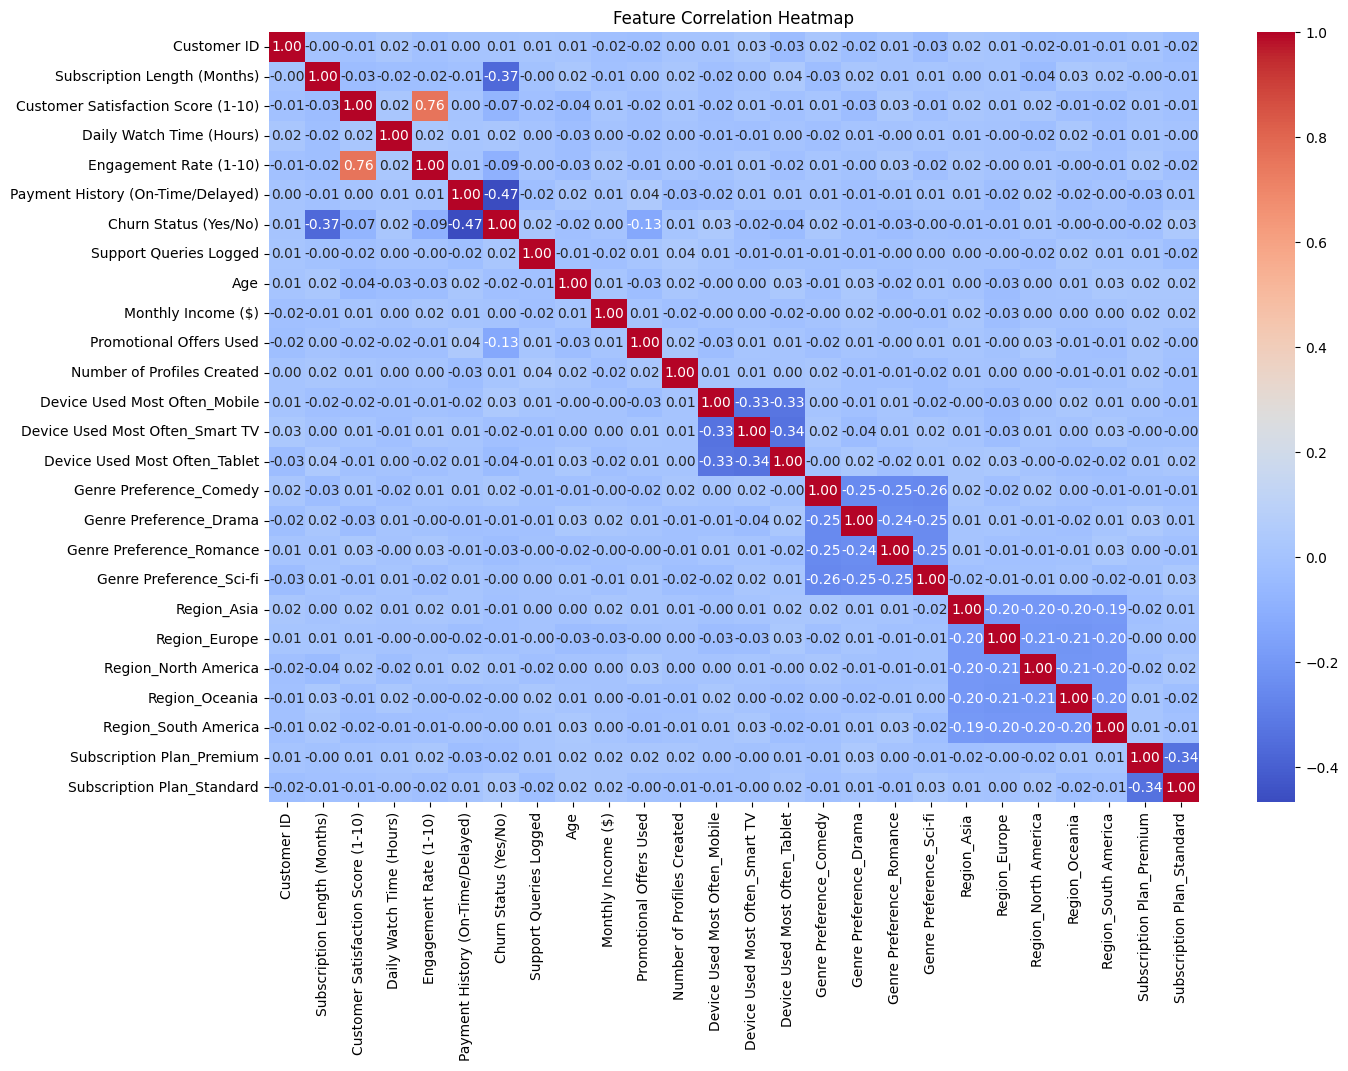

In [261]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

***Insights from the Correlation Heatmap***

**1. Churn Prediction Factors (Churn Status - Strong Negative Correlations)**
- Subscription Length (-0.37) → Customers with longer subscriptions are less likely to churn.
- Customer Satisfaction Score (-0.47) → Higher satisfaction leads to lower churn.
- Payment History (-0.47) → Customers who pay on time churn less, while those with delayed payments churn more.
- Key Takeaway: Improving satisfaction and ensuring timely payments can reduce churn.

**2. Subscription Plan & Income Relationship**
- Premium Plan & Monthly Income (0.34) → Higher-income users prefer the Premium Plan.
- Standard Plan & Monthly Income (-0.34) → Lower-income users tend to stay on the Standard Plan.
- Key Takeaway: Offering discounted Premium plans for lower-income users might drive upgrades.

**3. Customer Engagement Patterns**
- Customer Satisfaction & Engagement (0.76) → Satisfied customers watch more content and stay engaged.
- Support Queries & Churn (0.47) → More complaints lead to higher churn.
- Promotional Offers (-0.13 with Churn) → Those who use promotional offers tend to churn more.
- Key Takeaway: More engaged users and satisfied customers are less likely to churn. Reducing support issues is key to retention.

**4. Device & Region Preferences**
- Smart TV Users (-0.33 with Mobile Users) → Customers using Smart TVs are less likely to use Mobile for watching.
- Regional Differences → Some regions have a slight preference for specific subscription plans and engagement levels.
- Key Takeaway: Device-based personalization and regional pricing strategies can improve user experience.



# Model Training

## Churn prediction model 

We will try XGBoost, RandomForest Classifier and Logistic regression for churn prediction and choose either of them on the basis of the accuracy score.  

### XGBoost

In [262]:
selected_features = [
    "Subscription Length (Months)", 
    "Customer Satisfaction Score (1-10)", 
    "Daily Watch Time (Hours)", 
    "Engagement Rate (1-10)", 
    "Promotional Offers Used",
    "Subscription Plan_Premium",  
    "Subscription Plan_Standard"
]

#  Define X1 and y1 (Avoiding df Leakage)
X1 = df[selected_features]
y1 = df["Churn Status (Yes/No)"]

#  Train-test split with stratification to balance class distribution
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y1
)

#  XGBoost Model with Regularization to Prevent Overfitting
model = xgb.XGBClassifier(
    random_state=42, 
    reg_alpha=0.1,  # L1 Regularization (Lasso) to remove irrelevant features
    reg_lambda=1.0, # L2 Regularization (Ridge) to avoid overfitting
    max_depth=5, 
    n_estimators=100
)

#  Train the model
model.fit(X1_train, y1_train)

#  Predict on the test set
y1_pred = model.predict(X1_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.9

Confusion Matrix:
 [[599  22]
 [ 48  31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       621
           1       0.58      0.39      0.47        79

    accuracy                           0.90       700
   macro avg       0.76      0.68      0.71       700
weighted avg       0.89      0.90      0.89       700



The model is facing challenges due to class imbalance, with only 79 churners compared to 621 non-churners. This imbalance leads to poor recall for churners, as the model is biased toward predicting non-churn (`0`). Additionally, the precision for churners is low (0.58), indicating a high number of false positives. To address these issues, SMOTE (Synthetic Minority Oversampling Technique) can be applied to balance the dfset by oversampling the minority class (`1`). Furthermore, hyperparameter tuning can enhance model performance. Increasing the scale_pos_weight in XGBoost will help the model handle class imbalance more effectively, while adjusting the learning rate to 0.05 can improve recall and overall predictive accuracy.

In [263]:
#  Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X1_resampled, y1_resampled = smote.fit_resample(X1, y1)

#  Train-test split after resampling
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1_resampled, y1_resampled, test_size=0.2, random_state=42, stratify=y1_resampled
)

#  XGBoost Model with class weight balancing
xg_model = xgb.XGBClassifier(
    random_state=42, 
    reg_alpha=0.1,  
    reg_lambda=1.0, 
    max_depth=5, 
    n_estimators=100,
    scale_pos_weight=len(y1_train[y1_train == 0]) / len(y1_train[y1_train == 1]),  # Balance class weights
    learning_rate=0.05
)

#  Train the model
xg_model.fit(X1_train, y1_train)

#  Predict
y1_pred = xg_model.predict(X1_test)

#  Evaluate
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.8993558776167472

Confusion Matrix:
 [[532  89]
 [ 36 585]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.89       621
           1       0.87      0.94      0.90       621

    accuracy                           0.90      1242
   macro avg       0.90      0.90      0.90      1242
weighted avg       0.90      0.90      0.90      1242



In [264]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(xg_model, X1_resampled, y1_resampled, cv=5, scoring="accuracy")

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")  # Lower std dev means more stable model

Cross-Validation Scores: [0.82447665 0.91458501 0.9089444  0.91861402 0.92586624]
Mean Accuracy: 0.8985
Standard Deviation: 0.0374


After addressing the class imbalance issue, the updated model demonstrates a significant improvement in performance. The recall for churners (class 1) has increased from 0.39 to 0.94, indicating that the model is now much more effective at correctly identifying customers who are likely to churn. Additionally, the precision for churners has improved to 0.87, reducing the number of false positives. The overall F1-score has also balanced at 0.90, reflecting a well-optimized trade-off between precision and recall. These improvements highlight the effectiveness of applying SMOTE for oversampling the minority class and fine-tuning hyperparameters such as scale_pos_weight and learning rate. By addressing class imbalance and optimizing the model parameters, the predictive capability of the churn model has been significantly enhanced, making it more reliable for real-world applications.

### Random Forest Classifier

In [265]:
# Selected features
selected_features = [
    "Subscription Length (Months)", 
    "Payment History (On-Time/Delayed)",
    "Promotional Offers Used", 
    "Subscription Plan_Premium",  # OHE feature
    "Subscription Plan_Standard"  # OHE feature
]

# Define X1 (features) and y1 (target)
X1 = df[selected_features]
y1 = df["Churn Status (Yes/No)"]

#  Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X1_resampled, y1_resampled = smote.fit_resample(X1, y1)

# Train-test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_resampled, y1_resampled, test_size=0.2, random_state=42, stratify=y1_resampled)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth= 20,random_state=42, class_weight=None)
rf_model.fit(X1_train, y1_train)

# Predictions
y1_pred = rf_model.predict(X1_test)

# Model Evaluation
accuracy = accuracy_score(y1_test, y1_pred)
conf_matrix = confusion_matrix(y1_test, y1_pred)
class_report = classification_report(y1_test, y1_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.96

Confusion Matrix:
[[599  22]
 [ 17 293]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       621
           1       0.93      0.95      0.94       310

    accuracy                           0.96       931
   macro avg       0.95      0.95      0.95       931
weighted avg       0.96      0.96      0.96       931



In [266]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X1_resampled, y1_resampled, cv=5, scoring="accuracy")

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")  # Lower std dev means more stable model

Cross-Validation Scores: [0.93340494 0.97314715 0.96455424 0.96562836 0.97204301]
Mean Accuracy: 0.9618
Standard Deviation: 0.0146


### Logistic Regression

Logistic Regression is sensitive to different feature scales, so we standardize the df using StandardScaler.

In [267]:
# Selected Features
selected_features = [
    "Subscription Length (Months)", 
    "Payment History (On-Time/Delayed)",
    "Promotional Offers Used", 
    "Subscription Plan_Premium",  # OHE feature
    "Subscription Plan_Standard"  # OHE feature
]

# Define features (X) and target (y)
X = df[selected_features]
y = df["Churn Status (Yes/No)"]

# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression model
LogR_model = LogisticRegression(random_state=42)
LogR_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = LogR_model.predict(X_test_scaled)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.92

Confusion Matrix:
[[585  36]
 [ 39 271]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       621
           1       0.88      0.87      0.88       310

    accuracy                           0.92       931
   macro avg       0.91      0.91      0.91       931
weighted avg       0.92      0.92      0.92       931



In [268]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(LogR_model, X1_resampled, y1_resampled, cv=5, scoring="accuracy")

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")  # Lower std dev means more stable model

Cross-Validation Scores: [0.90225564 0.92588614 0.90118153 0.92158969 0.9172043 ]
Mean Accuracy: 0.9136
Standard Deviation: 0.0101


*Final Churn Prediction Model Comparison Summary*  

| **Metric**   | **XG Boost** | **Random Forest Classifier** | **Logistic Regression** |
|--------------|------------|------------|------------|
| **Accuracy** | 90%        | 96%        | 91%        |
| **Precision (Churn)** | 0.94       | 0.93       | 0.88       |
| **Recall (Churn)**    | 0.86       | 0.95       | 0.87       |
| **F1-Score (Churn)**  | 0.89       | 0.94       | 0.88       |

## Engagement scoring model 

The main goal of training this model is to achieve accuracy in predictiong the engagement score of a user. 

We will be implementing our model by using Linear Regression, XGBRegressor and RandomForest Regressor and choose the one among them which gives us the least error.

We will also use GridSearchCV and RandomizedSearchCV for hyperparameter tuning of the mentioned regression models. 

### Linear Regression

In [269]:
lr_features = [
    'Daily Watch Time (Hours)', 'Subscription Length (Months)',
    'Customer Satisfaction Score (1-10)', 'Promotional Offers Used',
    'Device Used Most Often_Mobile', 'Device Used Most Often_Tablet', 'Device Used Most Often_Smart TV',
    'Genre Preference_Comedy', 'Genre Preference_Drama', 'Genre Preference_Sci-fi',
    'Region_Asia', 'Region_Europe', 'Region_North America', 'Region_South America', 'Region_Oceania'
]
lr_target = 'Engagement Rate (1-10)'

scaler = StandardScaler()
df[['Daily Watch Time (Hours)', 'Subscription Length (Months)', 'Customer Satisfaction Score (1-10)']] = scaler.fit_transform(
    df[['Daily Watch Time (Hours)', 'Subscription Length (Months)', 'Customer Satisfaction Score (1-10)']])

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(df[lr_features], df[lr_target], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train_lr, y_train_lr)
y_pred_lr = lr.predict(X_test_lr)
print("Linear Regression Results:")
print(f"MAE: {mean_absolute_error(y_test_lr, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test_lr, y_pred_lr)}")
print(f"R2 Score: {r2_score(y_test_lr, y_pred_lr)}\n")


Linear Regression Results:
MAE: 1.4711630215434206
MSE: 3.5019713119327163
R2 Score: 0.5401029742615958



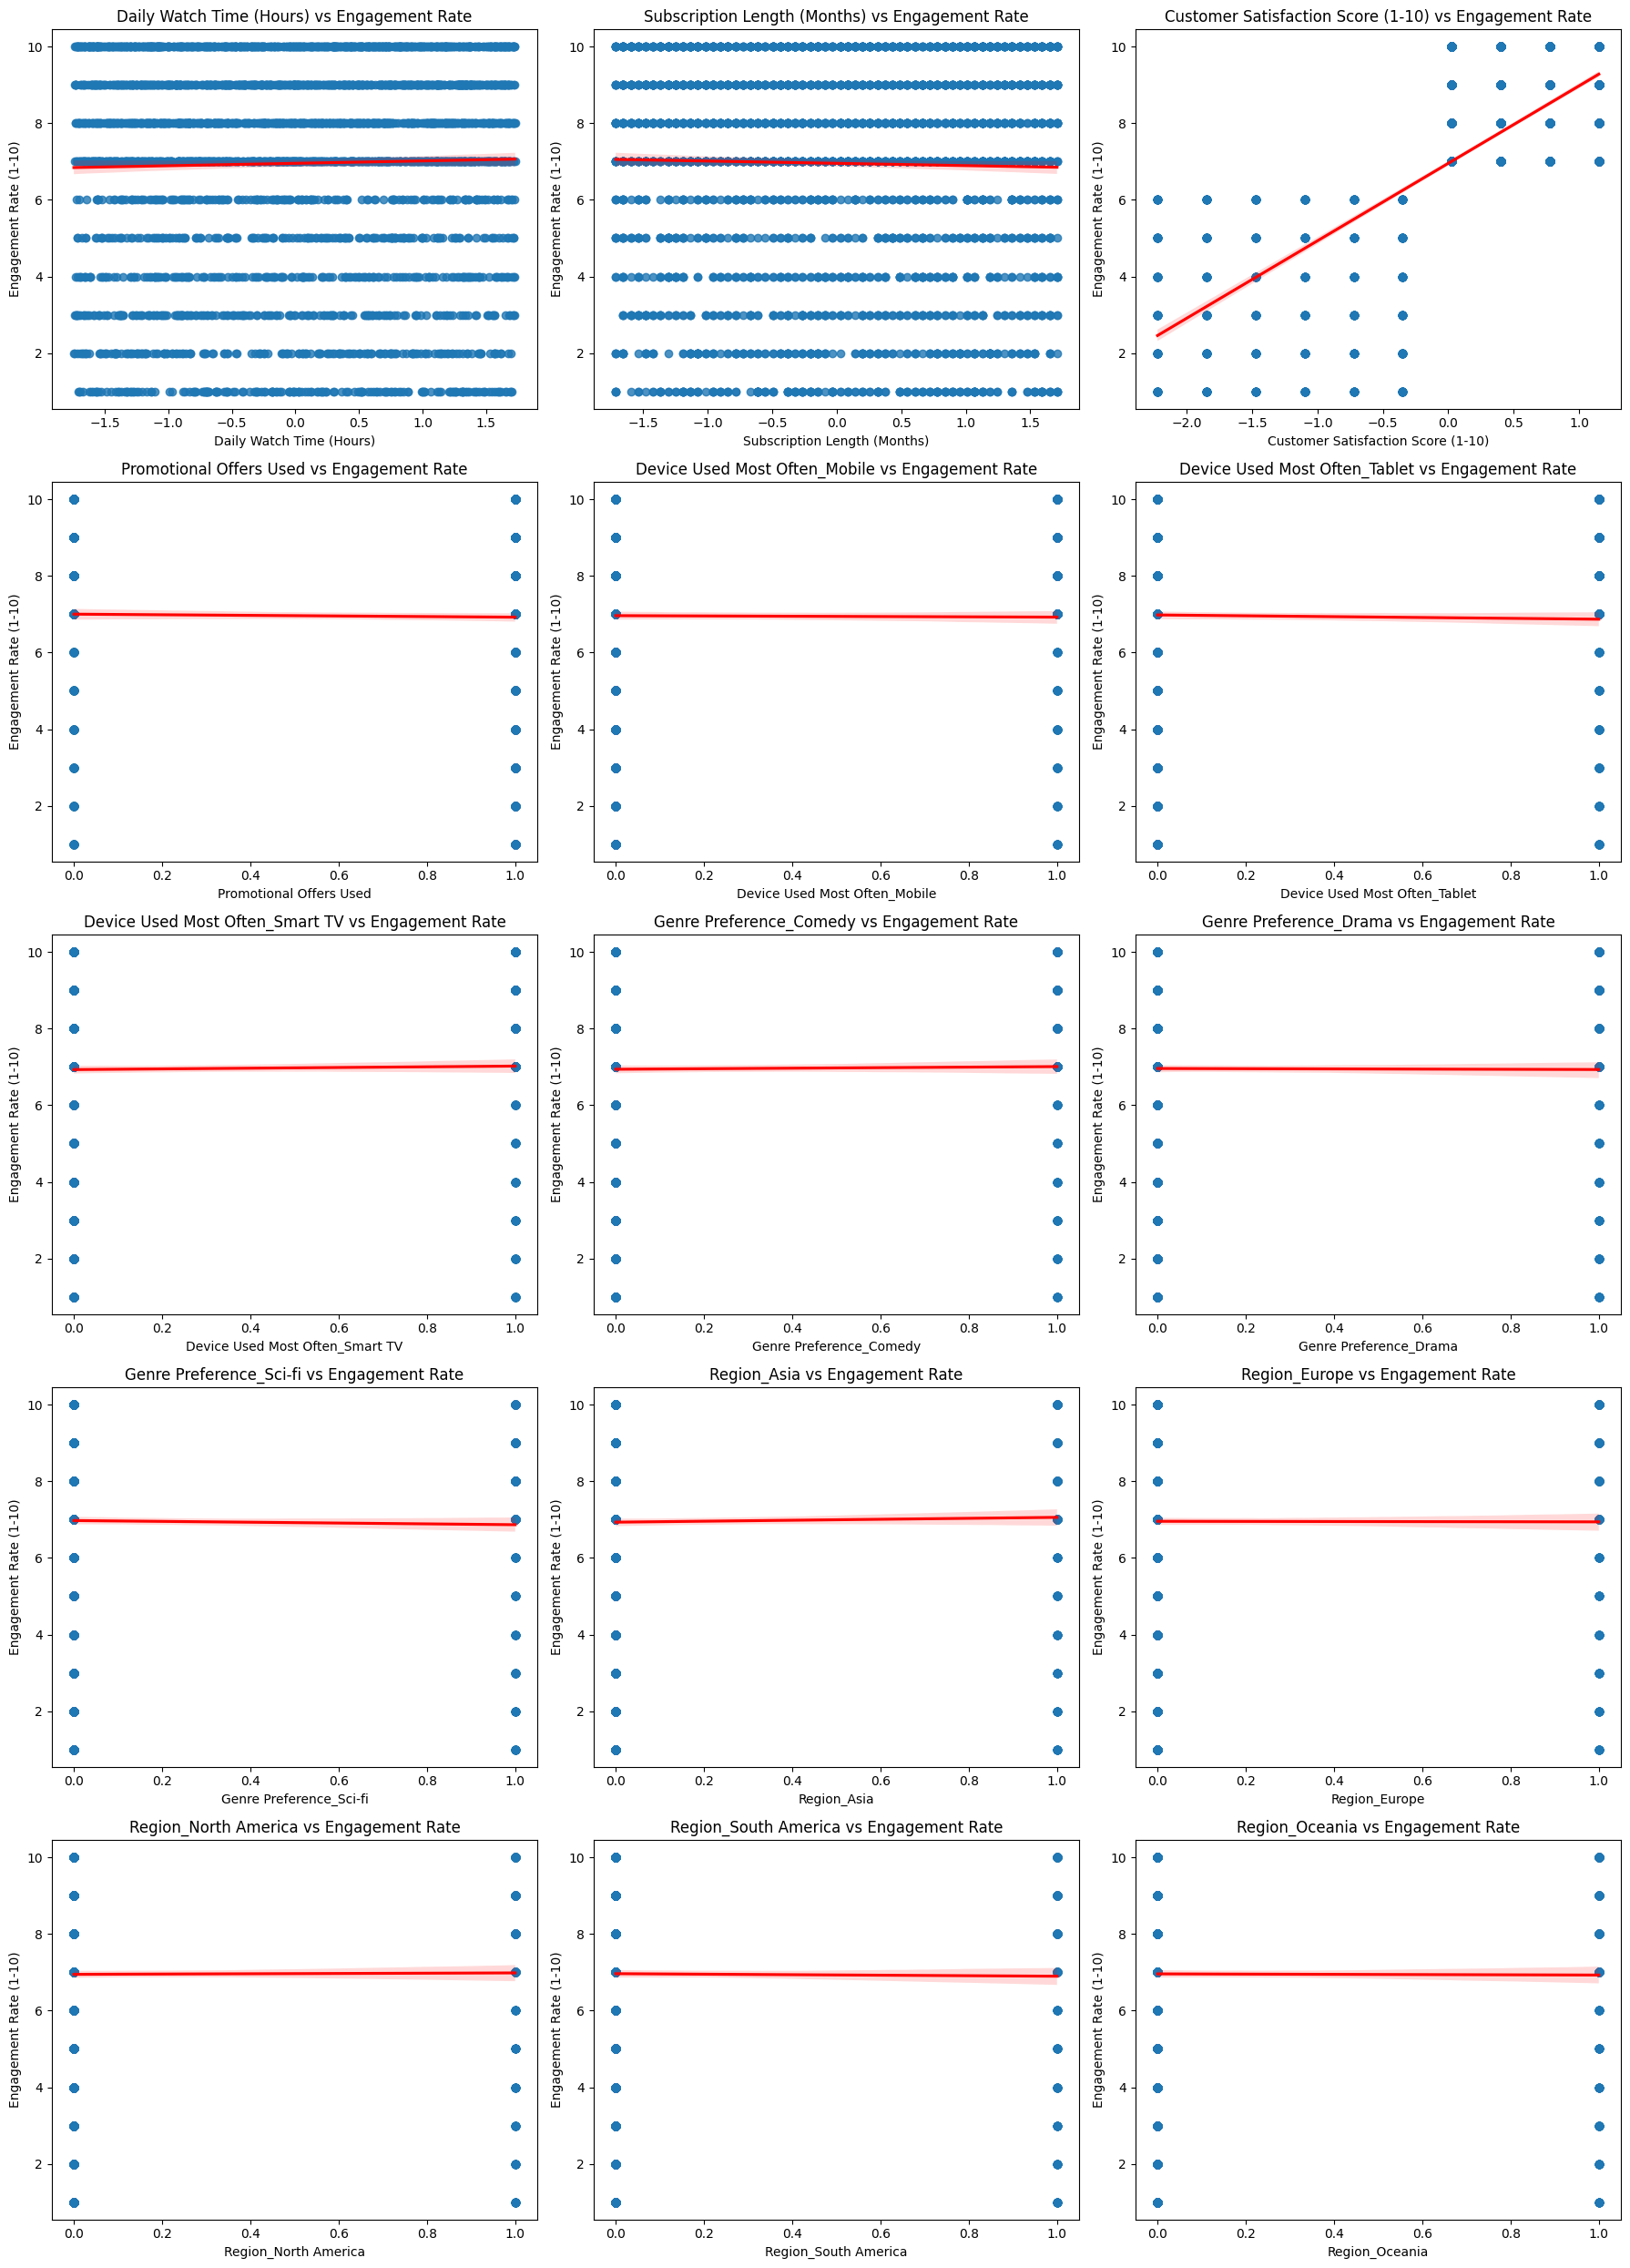

In [270]:
num_features = len(lr_features)
cols = 3
rows = (num_features + cols - 1) // cols  # Automatically calculate the required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each feature
for i, feature in enumerate(lr_features):
    sns.regplot(x=feature, y='Engagement Rate (1-10)', data=df, 
                ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f'{feature} vs Engagement Rate')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From the above graph, it is clear that our features are not truly linear and hence the model's R2 score is just 0.54 which is way lesser than 1, Now lets try some other Regression models.

### Random Forest Regression ( Using GridSearchCV )

In [271]:
rf_features = [
    'Daily Watch Time (Hours)', 'Subscription Length (Months)',
    'Customer Satisfaction Score (1-10)', 'Promotional Offers Used',
    'Device Used Most Often_Mobile', 'Device Used Most Often_Tablet', 'Device Used Most Often_Smart TV',
    'Genre Preference_Comedy', 'Genre Preference_Drama', 'Genre Preference_Sci-fi',
    'Region_Asia', 'Region_Europe', 'Region_North America', 'Region_South America', 'Region_Oceania'
]
rf_target = 'Engagement Rate (1-10)'

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df[rf_features], df[rf_target], test_size=0.2, random_state=42)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=5, scoring='r2', n_jobs=-1, verbose=2)
rf_grid.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_grid.predict(X_test_rf)
print("Random Forest GridSearch Results:")
print(f"MAE: {mean_absolute_error(y_test_rf, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test_rf, y_pred_rf)}")
print(f"R2 Score: {r2_score(y_test_rf, y_pred_rf)}\n")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Random Forest GridSearch Results:
MAE: 1.2109085498322951
MSE: 2.051076527293253
R2 Score: 0.7306419983368084



Random forest regression is giving us an R2 score of 0.72 which is far better than that of previous linear regression model. Let us do some hyperparameter tuning to check if there is a scope to increase the R2score.

In [272]:
print(f"Best Parameters: {rf_grid.best_params_}\n")

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}



In [273]:
rf_params = {
    'n_estimators': [250, 260, 270],
    'max_depth': [18, 20, 22, None],
    'min_samples_split': [10, 12, 14],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=5, scoring='r2', n_jobs=-1, verbose=2)
rf_grid.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_grid.predict(X_test_rf)
print("Random Forest GridSearch Results:")
print(f"MAE: {mean_absolute_error(y_test_rf, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test_rf, y_pred_rf)}")
print(f"R2 Score: {r2_score(y_test_rf, y_pred_rf)}\n")
print(f"Best Parameters: {rf_grid.best_params_}\n")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest GridSearch Results:
MAE: 1.2116423955980449
MSE: 2.0468554733686886
R2 Score: 0.7311963290187229

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 250}



### XG Boost Regression

In [274]:
xgb_features = [
    'Daily Watch Time (Hours)', 'Subscription Length (Months)',
    'Customer Satisfaction Score (1-10)', 'Promotional Offers Used',
    'Device Used Most Often_Mobile', 'Device Used Most Often_Tablet', 'Device Used Most Often_Smart TV',
    'Genre Preference_Comedy', 'Genre Preference_Drama', 'Genre Preference_Sci-fi',
    'Region_Asia', 'Region_Europe', 'Region_North America', 'Region_South America', 'Region_Oceania'
]
xgb_target = 'Engagement Rate (1-10)'

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(df[xgb_features], df[xgb_target], test_size=0.2, random_state=42)

xgb_params = {
    'n_estimators': randint(100, 300),
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

xgb_random = RandomizedSearchCV(XGBRegressor(random_state=42), param_distributions=xgb_params, n_iter=20, cv=3, scoring='r2', n_jobs=-1, random_state=42, verbose=2)
xgb_random.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = xgb_random.predict(X_test_xgb)
print("XGBoost RandomizedSearch Results:")
print(f"MAE: {mean_absolute_error(y_test_xgb, y_pred_xgb)}")
print(f"MSE: {mean_squared_error(y_test_xgb, y_pred_xgb)}")
print(f"R2 Score: {r2_score(y_test_xgb, y_pred_xgb)}")
print(f"Best Parameters: {xgb_random.best_params_}\n")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
XGBoost RandomizedSearch Results:
MAE: 1.2276131738935199
MSE: 2.1885322947921355
R2 Score: 0.7125905752182007
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 256, 'subsample': 1}



Let's do some hyperparameter tuning to check if the R2 score increases or not.

In [275]:
xgb_params = {
    'n_estimators': randint(100, 300),
    'max_depth': [1, 3, 5],
    'learning_rate': [0.008, 0.01, 0.02],
    'subsample': [1, 1.2, 1.4],
    'colsample_bytree': [0.5, 0.6, 0.7]
}

xgb_random = RandomizedSearchCV(XGBRegressor(random_state=42), param_distributions=xgb_params, n_iter=20, cv=3, scoring='r2', n_jobs=-1, random_state=42, verbose=2)
xgb_random.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = xgb_random.predict(X_test_xgb)
print("XGBoost RandomizedSearch Results:")
print(f"MAE: {mean_absolute_error(y_test_xgb, y_pred_xgb)}")
print(f"MSE: {mean_squared_error(y_test_xgb, y_pred_xgb)}")
print(f"R2 Score: {r2_score(y_test_xgb, y_pred_xgb)}")
print(f"Best Parameters: {xgb_random.best_params_}\n")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
XGBoost RandomizedSearch Results:
MAE: 1.221429056099483
MSE: 2.1413707287485995
R2 Score: 0.7187840938568115
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 289, 'subsample': 1}



*Final Engagement Analysis Model Comparison Summary*  

| **Metric**   | **Linear Regression** | **Random Forest Regression** | **XG Boost Regression** |
|--------------|------------|------------|------------|
| **MAE** | 1.47        | 1.21        | 1.22        |
| **MSE** | 3.50       | 2.04       | 2.14       |
| **R2 Score**    | 0.54      | 0.73      | 0.72       |

### Customer Segmentation Model

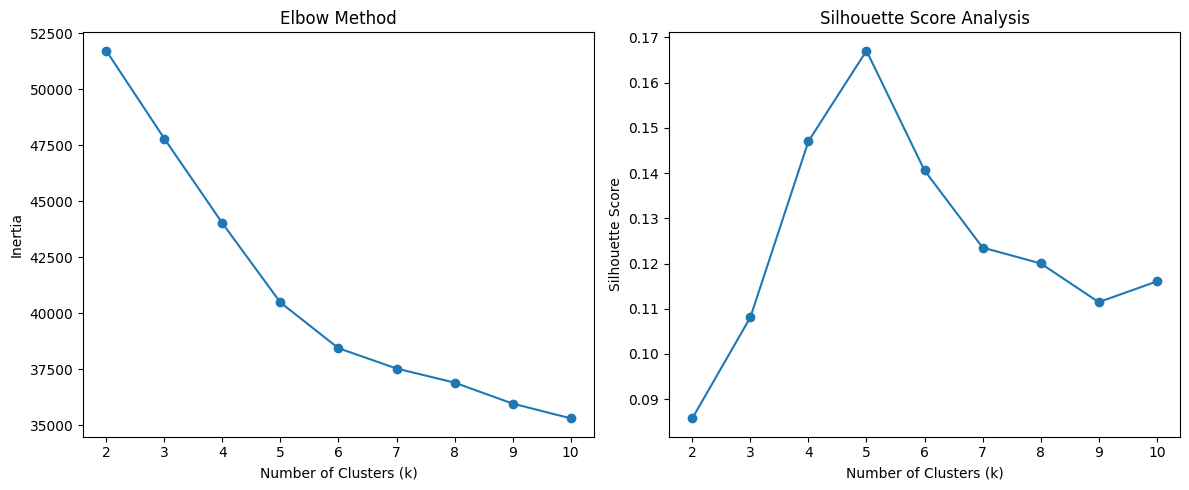

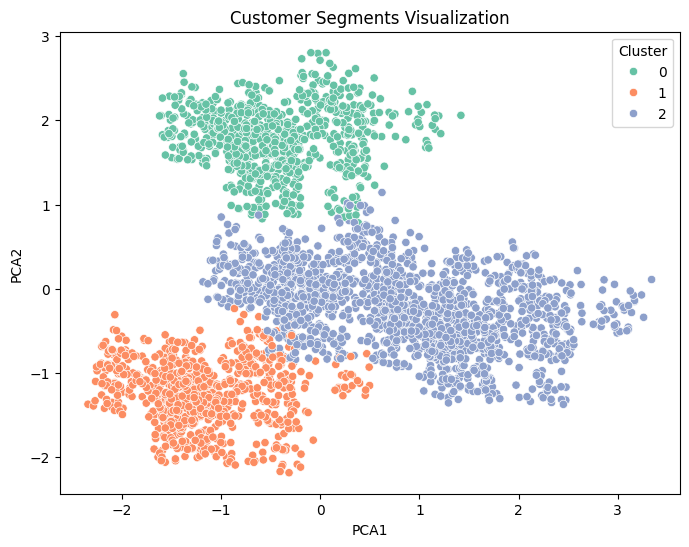

Cluster Summary:
         Subscription Length (Months)  Customer Satisfaction Score (1-10)  \
Cluster                                                                     
0                           -0.027313                           -0.030224   
1                            0.005464                            0.021314   
2                            0.010541                            0.003896   

         Daily Watch Time (Hours)  Payment History (On-Time/Delayed)  \
Cluster                                                                
0                       -0.022085                           0.767251   
1                       -0.024211                           0.789238   
2                        0.023091                           0.780947   

         Promotional Offers Used  Device Used Most Often_Mobile  \
Cluster                                                           
0                       0.589474                            1.0   
1                       0.623318   

In [276]:
# Select relevant features for segmentation
cluster_features = [
    'Subscription Length (Months)', 'Customer Satisfaction Score (1-10)',
    'Daily Watch Time (Hours)', 'Payment History (On-Time/Delayed)',
    'Promotional Offers Used', 'Device Used Most Often_Mobile',
    'Device Used Most Often_Tablet', 'Device Used Most Often_Smart TV',
    'Genre Preference_Comedy', 'Genre Preference_Drama',
    'Genre Preference_Sci-fi', 'Region_Asia', 'Region_Europe',
    'Region_North America', 'Region_South America', 'Region_Oceania'
]

X = df[cluster_features]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding Optimal Clusters
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Elbow Method Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.tight_layout()
plt.show()

optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('Customer Segments Visualization')
plt.show()

cluster_summary = df.groupby('Cluster')[cluster_features].mean()
print("Cluster Summary:")
print(cluster_summary)

*Output gained from above cluster summary :*

**Cluster 0: Predominantly Mobile Users**

- Subscription Length: Slightly below average.
- Customer Satisfaction: Slightly lower satisfaction (-0.03).
- Watch Time: Slightly below average.
- Payment History: Lowest on-time payments (0.767).
- Device Preference: 100% Mobile users.
- Promotional Offers: Moderate engagement (0.589).
- Genre Preferences: Balanced but slightly lower for Drama.
- Regional Distribution: Slightly higher presence in Oceania.
- Interpretation: These might be casual, price-sensitive users who prefer consuming content on-the-go. Consider targeting them with mobile-specific offers and flexible subscription plans.

**Cluster 1: Smart TV Users with Good Payment History**

- Subscription Length: Average.
- Customer Satisfaction: Slightly above average.
- Payment History: Best among all (0.789).
- Device Preference: 100% Smart TV users.
- Promotional Offers: High engagement (0.623).
- Genre Preferences: Higher preference for Sci-Fi.
- Regional Distribution: Fairly distributed, but more in North America.
- Interpretation: Likely loyal and stable customers, possibly family-oriented. Offering exclusive content for Smart TVs or premium bundles could enhance retention.

**Cluster 2: Tablet Users and Heavy Watchers**

- Subscription Length & Satisfaction: Slightly above average.
- Daily Watch Time: Highest among all clusters.
- Payment History: Moderate (0.780).
- Device Preference: 50% Tablet users.
- Promotional Offers: Highest usage of offers (0.624).
- Genre Preferences: Higher preference for Drama.
- Regional Distribution: Significant presence in Europe.
- Interpretation: Active and engaged users, likely enjoying offers. Focus on loyalty programs or exclusive deals to retain this segment.

## Subscription Optimization

 Each cluster is analyzed to derive tailored optimization strategies, such as enhancing device-specific experiences, offering personalized promotions, and curating content based on regional trends. These strategies aim to maximize user engagement, satisfaction, and retention.



In [277]:
classification_features = [
    'Subscription Length (Months)', 'Customer Satisfaction Score (1-10)',
    'Daily Watch Time (Hours)', 'Payment History (On-Time/Delayed)',
    'Promotional Offers Used', 'Device Used Most Often_Mobile',
    'Device Used Most Often_Tablet', 'Device Used Most Often_Smart TV',
    'Genre Preference_Comedy', 'Genre Preference_Drama',
    'Genre Preference_Sci-fi', 'Region_Asia', 'Region_Europe',
    'Region_North America', 'Region_South America', 'Region_Oceania'
]

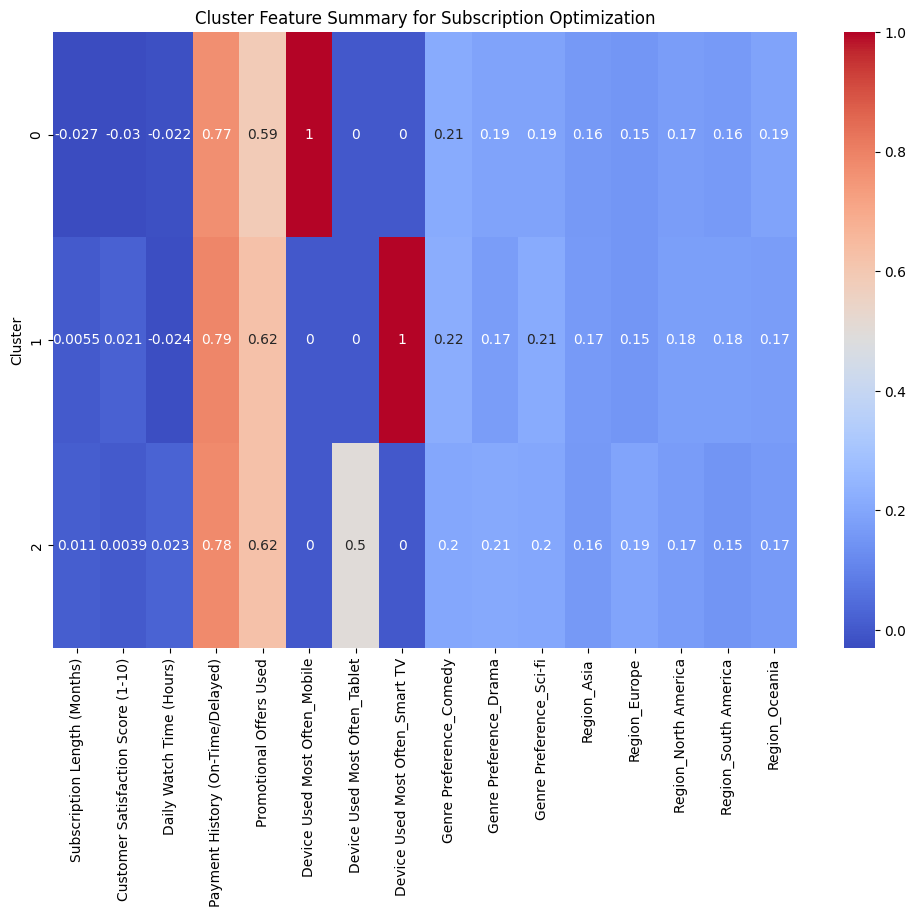

In [278]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm')
plt.title('Cluster Feature Summary for Subscription Optimization')
plt.show()

| **Cluster** | **Key Characteristics**                                                                                     | **Optimization Strategy**                                                                 |
|-------------|------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------|
| **0**       | High payment history (0.77) and promotional offers usage (0.59)                                              | Offer personalized promotions to retain users and maintain payment reliability.            |
|             | Dominantly mobile device usage (1.0)                                                                         | Optimize the mobile experience and introduce mobile-exclusive offers.                     |
|             | Moderate engagement in genre preferences and regional diversity                                              | Provide diverse content suggestions based on popular regional trends.                     |
| **1**       | Highest payment history (0.79) and promotional offer usage (0.62)                                            | Target with exclusive promotions to encourage plan upgrades.                              |
|             | Dominantly smart TV usage (1.0)                                                                              | Enhance the Smart TV experience with exclusive content previews.                          |
|             | Balanced engagement in genre preferences                                                                     | Introduce loyalty programs focused on Smart TV users.                                     |
| **2**       | Moderate payment history (0.78) and promotional offer usage (0.62)                                           | Increase personalized offers for tablet users to encourage engagement.                    |
|             | Mixed device usage with notable tablet use (0.5)                                                             | Optimize the interface for tablets and provide device-specific content recommendations.   |
|             | Slightly higher preference for diverse regions                                                               | Curate content based on regional preferences to increase satisfaction.                    |
